In [16]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dfcounty = pd.read_csv('US.csv')
df = pd.read_csv('HCS.csv')
df1 = pd.read_csv('HCS-1.csv')
df2 = pd.read_csv('PR.csv')
dfall = pd.concat([df,df1])
dfnew = pd.merge(dfall,dfcounty,on=['City','State'],how='inner')
#print(dfnew)
#dfnew2 = dfnew.drop_duplicates()
dfnew['Crimes']=dfnew['1st quarter']+dfnew['2nd quarter']+dfnew['3rd quarter']+dfnew['4th quarter']
dfcrimes=dfnew[['County','Crimes']]
dfcrimes2=dfcrimes.groupby(['County'])[['Crimes']].sum().reset_index()
dfpres = df2.groupby('County').sum().reset_index()
CrimesTotal=dfcrimes2.merge(dfpres,on=['County'],how='inner')

dfcpc = pd.merge(dfall,dfcounty,on=['City','State'],how='inner')
dfcpc['Crimes']=dfcpc['1st quarter']+dfcpc['2nd quarter']+dfcpc['3rd quarter']+dfcpc['4th quarter']/(dfcpc['Population']/100000)
dfcrimescpc=dfcpc[['County','Crimes']]
dfcrimescpc2=dfcrimescpc.groupby(['County'])[['Crimes']].sum().reset_index()
dfcpcpres = df2.groupby('County').sum().reset_index()
CrimesCPC=dfcrimescpc2.merge(dfcpcpres,on=['County'],how='inner')


# create a fitted model in one line
#lm = smf.ols(formula='Crimes ~ Binary', data=CrimesTotal).fit()

# print the coefficients
#lm.summary()


# create a fitted model in one line
lm2 = smf.ols(formula='Crimes ~ Binary', data=CrimesCPC).fit()

# print the coefficients
lm2.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Crimes   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     16.23
Date:                Mon, 10 Apr 2017   Prob (F-statistic):           5.92e-05
Time:                        21:02:33   Log-Likelihood:                -11814.
No. Observations:                1394   AIC:                         2.363e+04
Df Residuals:                    1392   BIC:                         2.364e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    408.9367     82.450      4.960      0.000       247.197   570.677
Binary      -358.5733     89.014     -4.028      0.000      -533.189  -183.958
==============================================================================
Omnibus:                     3153.681   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14106987.247
Skew:                          20.437   Prob(JB):                         0.00
Kurtosis:                     494.126   Cond. No.                         5.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
logit = smf.Logit(CrimesCPC['Binary'], CrimesCPC['Crimes'])

result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.693065
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                 Binary   No. Observations:                 1394
Model:                          Logit   Df Residuals:                     1393
Method:                           MLE   Df Model:                            0
Date:                Mon, 10 Apr 2017   Pseudo R-squ.:                 -0.6960
Time:                        20:57:39   Log-Likelihood:                -966.13
converged:                       True   LL-Null:                       -569.65
                                        LLR p-value:                       nan
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Crimes     -2.232e-05   4.77e-05     -0.468      0.640        -0.000  7.12e-05


In [39]:
# Remove Outliers outside of 3 std deviations
CrimesCPC[np.abs(CrimesCPC - CrimesCPC.mean()) > 3 * CrimesCPC.std()] = np.nan
null_data = CrimesCPC[CrimesCPC.isnull().any(axis=1)]
print(null_data)

                    County  Crimes  Binary
9                  Alameda     NaN       0
20               Allegheny     NaN       0
115                  Bexar     NaN       0
200                Cambria     NaN       1
312                   Cook     NaN       1
349                 Dallas     NaN       1
374                 Denver     NaN       0
386   District of Columbia     NaN       0
420                El Paso     NaN       1
445                Fayette     NaN       1
463               Franklin     NaN       1
543               Hamilton     NaN       1
562                 Harris     NaN       1
575               Hennepin     NaN       0
631                Jackson     NaN       1
651                Kanawha     NaN       1
673                   King     NaN       1
749            Los Angeles     NaN       0
776               Maricopa     NaN       1
780                 Marion     NaN       1
892               New York     NaN       0
990           Philadelphia     NaN       0
1093       

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\ops.py:995: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 1394
  yrav = yrav[mask]


In [40]:
# Replace null values with group means
CrimesCPC['Crimes'].fillna(CrimesCPC.groupby('Binary')['Crimes'].transform("mean"), inplace=True)

In [44]:
X = CrimesCPC['Binary']
X.shape
Y = CrimesCPC['Crimes']
Y.shape

(1394,)

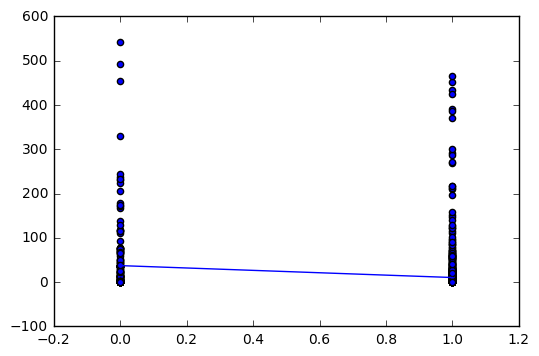

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(X[:, np.newaxis], Y)

xfit = np.linspace(0, 1, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(X, Y)
plt.plot(xfit, yfit);